In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi

In [5]:
# Load data text file (in V/m)
data = np.loadtxt('e-field.txt', skiprows=2)
pos_x_import = data[:,0]
pos_y_import = data[:,1]
pos_z_import = data[:,2]
field_re_x_import = data[:,3]
field_re_y_import = data[:,4]
field_re_z_import = data[:,5]
field_im_x_import = data[:,6]
field_im_y_import = data[:,7]
field_im_z_import = data[:,8]

# Select data for plots: Use Y as X, and Z as Y
pos_x = pos_y_import
pos_y = pos_z_import
field_re_x = field_re_y_import
field_im_x = field_im_y_import
field_re_y = field_re_z_import
field_im_y = field_im_z_import
field_re_z = field_re_x_import
field_im_z = field_im_x_import

# Clean up data
   # Set origin to [0,0]
pos_x -= np.min(pos_x)
pos_y -= np.min(pos_y)

# Useful parameters
size_x = np.size(np.unique(pos_x))
size_y = np.size(np.unique(pos_y))
num_points = np.size(pos_x)

# Print info
print('Axis, x:\t min=', np.min(pos_x), ',\t max=', np.max(pos_x), 
      ',\t range=', np.max(pos_x)-np.min(pos_x), ',\t unique values=', size_x)
print('Axis, y:\t min=', np.min(pos_y), ',\t max=', np.max(pos_y), 
      ',\t range=', np.max(pos_y)-np.min(pos_y), ',\t unique values=', size_y)

print('Field (real), x: min=', np.min(field_re_x), ',\t max=', np.max(field_re_x),
      ',\t range=', np.max(field_re_x)-np.min(field_re_x))
print('Field (real), y: min=', np.min(field_re_y), ',\t max=', np.max(field_re_y),
      ',\t range=', np.max(field_re_y)-np.min(field_re_y))

Axis, x:	 min= 0.0 ,	 max= 200.0 ,	 range= 200.0 ,	 unique values= 201
Axis, y:	 min= 0.0 ,	 max= 250.0 ,	 range= 250.0 ,	 unique values= 251
Field (real), x: min= -1637960.0 ,	 max= 1514400.0 ,	 range= 3152360.0
Field (real), y: min= -662209.0 ,	 max= 693536.0 ,	 range= 1355745.0


### Normalise the field to the zero-point electric field

\begin{equation*}
\hbar \omega_c = \int \epsilon(r) \, |E(r)^2| \, d^2r
\end{equation*}

In [6]:
# Convert position arrays into vectors
stepsize = 1
x,y = np.mgrid[np.min(pos_x):np.max(pos_x)+stepsize:stepsize,
               np.min(pos_y):np.max(pos_y)+stepsize:stepsize]
# Convert field arrays in vectors
field_mag = np.zeros([size_x, size_y])
field_re_x_vec = np.zeros([size_x, size_y])
field_im_x_vec = np.zeros([size_x, size_y])
field_re_y_vec = np.zeros([size_x, size_y])
field_im_y_vec = np.zeros([size_x, size_y])
field_re_z_vec = np.zeros([size_x, size_y])
field_im_z_vec = np.zeros([size_x, size_y])
i = num_points-1
for y_i in np.arange(0, size_y, 1):
    for x_i in np.arange(0, size_x, 1):
        field_re_x_vec[x_i, y_i] = field_re_x[i]
        field_im_x_vec[x_i, y_i] = field_im_x[i]
        field_re_y_vec[x_i, y_i] = field_re_y[i]
        field_im_y_vec[x_i, y_i] = field_im_y[i]
        field_re_z_vec[x_i, y_i] = field_re_z[i]
        field_im_z_vec[x_i, y_i] = field_im_z[i]
        i-=1
        
field_mag = np.sqrt(field_re_x_vec**2 + field_re_y_vec**2 + field_re_z_vec**2)       

# Integrate zero-point electric field
frequency = 20.5 * 10**9
epsilon_r_silicon = 11.68
epsilon_0 = 8.85418782 * 10**-12
epsilon = np.ones_like(field_mag) * epsilon_0
epsilon[:,0:100] *= epsilon_r_silicon
integral = np.sum( epsilon * field_mag**2 * (stepsize*10**-6)**3 )
zero_point_norm = integral / (hbar * 2 * pi * frequency)
field_mag = field_mag / zero_point_norm

# Crop data [xmin,xmax,ymin,ymax]
crop = [60,60,100,70]
x = x[crop[0]:-crop[1],crop[2]:-crop[3]]
y = y[crop[0]:-crop[1],crop[2]:-crop[3]]
field_mag = field_mag[crop[0]:-crop[1],crop[2]:-crop[3]]
field_re_x_vec = field_re_x_vec[crop[0]:-crop[1],crop[2]:-crop[3]]
field_re_y_vec = field_re_y_vec[crop[0]:-crop[1],crop[2]:-crop[3]]

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


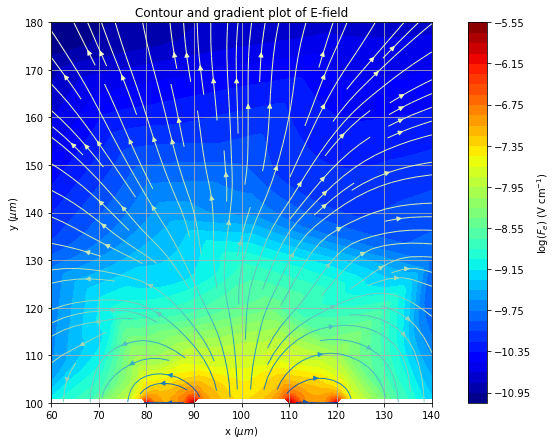

In [68]:
# Gradient plot
ncontours = 50 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

plt.figure(figsize=(9,7))
plt.contourf(x,y,np.log(field_mag),ncontours,cmap=plt.cm.jet, interpolation='log')
cbar = plt.colorbar(label='log($F_{e}$) (V cm$^{-1}$)')
#plt.imshow(np.log(np.transpose(field_mag)), interpolation='none', origin='lower', cmap=plt.cm.YlGnBu,
#           extent=(np.min(x),np.max(x),np.min(y),np.max(y)) )
plt.streamplot(np.transpose(x),np.transpose(y),np.transpose(field_re_x_vec),np.transpose(field_re_y_vec),
              color=np.log(np.transpose(field_mag)), linewidth=1, cmap=plt.cm.YlGnBu, density=1.0)
plt.grid()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([crop[0],size_x-1-crop[1],crop[2],size_y-1-crop[3]]) # specify xlim,ylim
plt.title("Contour and gradient plot of E-field")
plt.xlabel("x ($\mu m$)")
plt.ylabel("y ($\mu m$)")

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


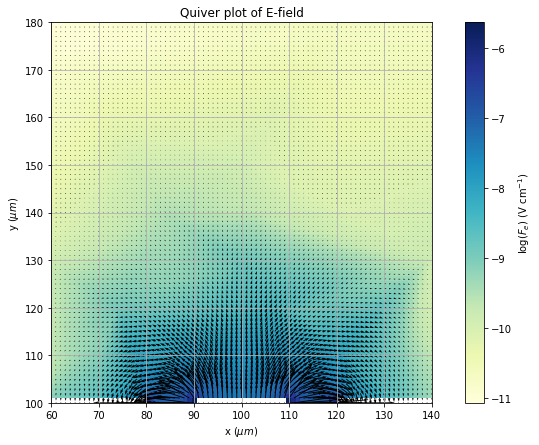

In [55]:
# Quiver plot
plt.figure(figsize=(12,7))
plt.quiver(x,y,field_re_x_vec,field_re_y_vec)
plt.imshow(np.log(np.transpose(field_mag)), interpolation='none', origin='lower', cmap=plt.cm.YlGnBu,
           extent=(np.min(x),np.max(x),np.min(y),np.max(y)) )
plt.axis('scaled') # aspect ratio 1:1
plt.title("Quiver plot of E-field");
plt.axis([crop[0],size_x-1-crop[1],crop[2],size_y-1-crop[3]]) # specify xlim,ylim
plt.grid()
plt.xlabel("x ($\mu m$)")
plt.ylabel("y ($\mu m$)")
cbar = plt.colorbar()
cbar.set_label('log($F_{e}$) (V cm$^{-1}$)')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


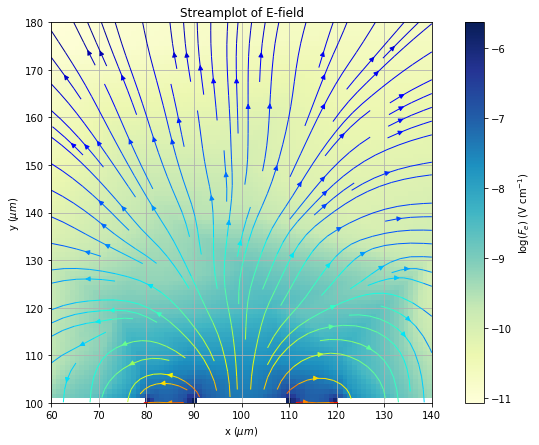

In [48]:
# Stream plot
plt.figure(figsize=(12,7))
plt.streamplot(np.transpose(x),np.transpose(y),np.transpose(field_re_x_vec),np.transpose(field_re_y_vec),
              color=np.log(np.transpose(field_mag)), linewidth=1, cmap=plt.cm.jet)
plt.imshow(np.log(np.transpose(field_mag)), interpolation='none', origin='lower', cmap=plt.cm.YlGnBu,
           extent=(np.min(x),np.max(x),np.min(y),np.max(y)) )
plt.axis('scaled') # aspect ratio 1:1
plt.axis([crop[0],size_x-1-crop[1],crop[2],size_y-1-crop[3]]) # specify xlim,ylim
plt.title("Streamplot of E-field")
plt.grid()
plt.xlabel("x ($\mu m$)")
plt.ylabel("y ($\mu m$)")
cbar = plt.colorbar()
cbar.set_label('log($F_{e}$) (V cm$^{-1}$)')